In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [3]:
# Make a scatterplot of subway stations with latitude and longitude
# as the x and y axis and ridership as the bubble size

In [4]:
# First thing is to group the data by latitude and longitude
# and find the mean ridership for each location
data_by_location = subway_df.groupby(['latitude', 'longitude']).mean()

In [5]:
# Look at first few rows to see if it worked
data_by_location.head()

,,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
latitude,longitude,,,,,,,,,,,,,,,,,,,
40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,0.006284,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,0.006216,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,0.006183,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,0.006118,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,0.002744,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [6]:
# Get out the latitude and longitudes in order to make the scatter plot
# Adding latitude at tht end doesn't work because they're now row
# indexes by dataframe
data_by_location.head()['latitude']

KeyError: 'latitude'

In [7]:
# Prevent this by passing as_index false
data_by_location = subway_df.groupby(['latitude', 'longitude'],
                                     as_index=False).mean()

In [8]:
# So now it works
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

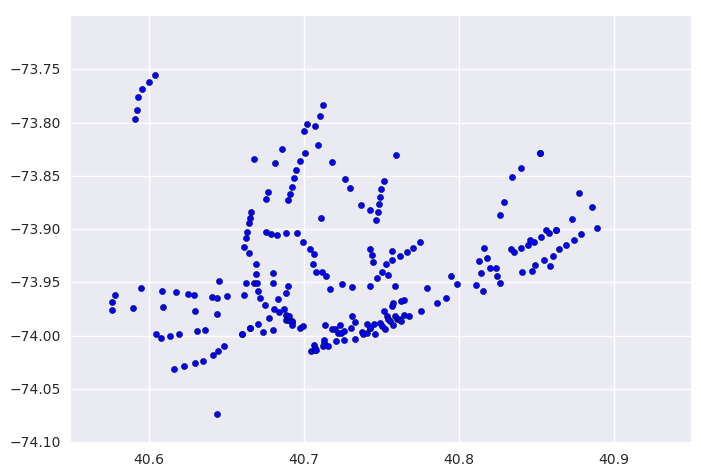

In [9]:
# Now plotting with latitude as X and longitude as Y
plt.scatter(data_by_location['latitude'], data_by_location['longitude'])

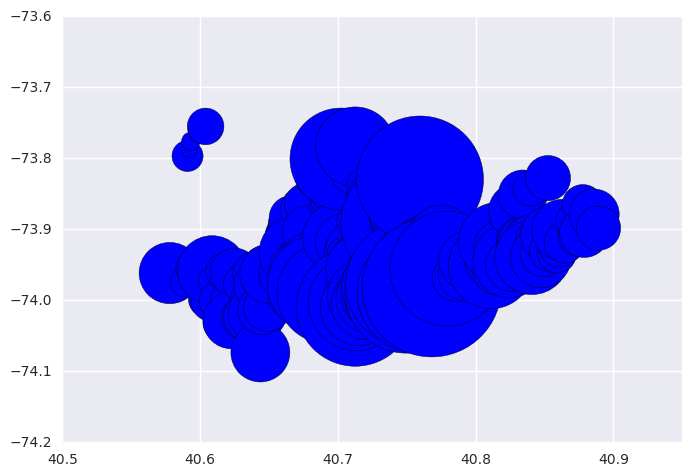

In [10]:
# This created a scatter plot of all the subway stations
# Bubble size is not dependent on the ridership
# Give argument S to the scatter function
# s can be an array 
plt.scatter(data_by_location['latitude'], data_by_location['longitude'],
            s=data_by_location['ENTRIESn_hourly'])

In [12]:
# Bubbles are huge so hard to understand
# So we'll make a new variable called scaled_entries
# To scale the hourly entries we'll divide by the stddev
scaled_entries = (data_by_location['ENTRIESn_hourly'] /
                 data_by_location['ENTRIESn_hourly'].std())

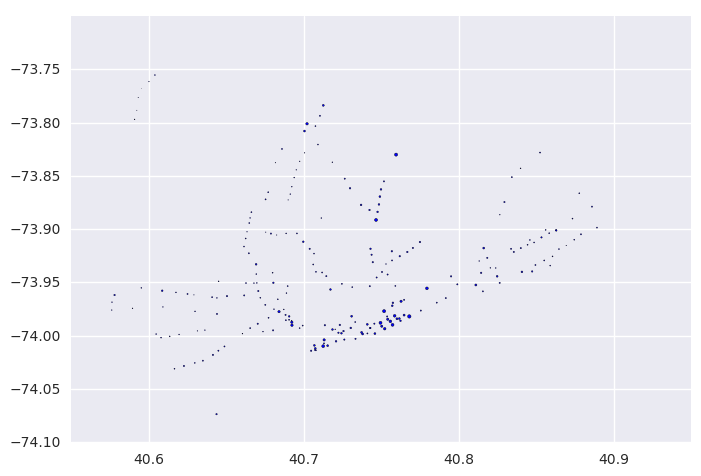

In [13]:
# Change the size argument on the scatterplot to be 
# the scaled entries rather than raw entries
plt.scatter(data_by_location['latitude'], data_by_location['longitude'],
            s=scaled_entries)

In [ ]:
# The bubbles are a little small so we can play around with the scale factor